In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import make_blobs

In [21]:
data = make_blobs(n_samples=40, n_features=2, centers=[[1, 1], [3, 3]])

In [22]:
data

(array([[ 0.52713633,  1.3341307 ],
        [ 3.7621343 ,  1.79155053],
        [ 1.6655025 ,  0.5549278 ],
        [ 1.87057079,  3.9340878 ],
        [ 3.31418488,  3.20083736],
        [ 2.94739274,  2.50201783],
        [ 3.76818467,  3.76137055],
        [ 0.29736495, -1.29133262],
        [ 0.91249018,  0.42611176],
        [ 1.72782037, -0.19002161],
        [ 1.66409981,  1.71408872],
        [ 3.35134798,  6.05946191],
        [ 2.45355262,  1.76761295],
        [ 0.80870628,  2.35591908],
        [ 3.74104533,  2.7935126 ],
        [ 0.86433311,  1.45764523],
        [ 0.14551672,  1.37723612],
        [ 0.09835748,  2.00217764],
        [ 1.00036848,  1.33610279],
        [ 3.59300047,  3.50769503],
        [-0.01169091,  1.82468442],
        [ 1.94137915,  3.7854021 ],
        [ 0.76887734,  0.14487315],
        [ 1.57617882,  1.88362826],
        [-0.09768276,  1.34758369],
        [ 1.30462184,  1.64453902],
        [ 2.98767804,  4.97610545],
        [ 3.36649563,  3.484

In [23]:
X = data[0]
y = data[1]

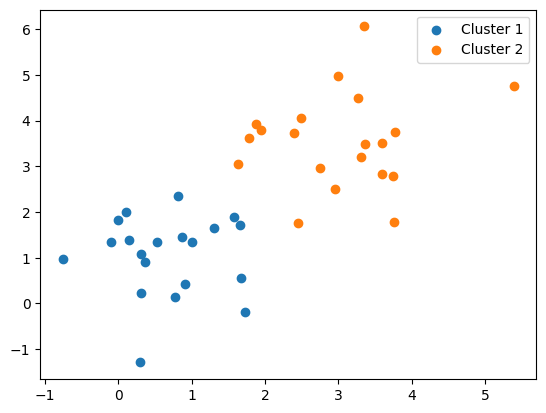

In [27]:
plt.scatter(X[y==0,0], X[y==0,1], label="Cluster 1")
plt.scatter(X[y==1,0], X[y==1,1], label="Cluster 2")
plt.legend()
plt.show()

In [41]:
def find_optimal_cluserts(data, n_clusters=10):
    all_scores = []
    for i in range(2, n_clusters+1):
        model = AgglomerativeClustering(n_clusters=i)
        pred = model.fit_predict(data)
        score = silhouette_score(data, pred)
        all_scores.append(score)
        best_clusters = np.argmax(all_scores)+2
        return best_clusters

In [42]:
best_n_clusters = find_optimal_cluserts(X)

In [43]:
agg_model = AgglomerativeClustering(n_clusters=best_n_clusters)

In [44]:
labels = agg_model.fit_predict(X)

In [45]:
labels

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [56]:
labels = np.array(list(map(lambda x: np.abs(x-1), labels)))

In [57]:
labels

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y, labels)

1.0

In [52]:
y

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [61]:
d1 = np.random.randint(1, 9, 10)
d2 = np.random.randint(1, 9, 10)
d1, d2

(array([4, 7, 8, 7, 2, 8, 6, 8, 5, 1]), array([2, 2, 7, 4, 3, 8, 7, 6, 6, 2]))

In [62]:
df = pd.DataFrame({"A":d1, "B":d2})
df.head()

,A,B
0,4,2
1,7,2
2,8,7
3,7,4
4,2,3


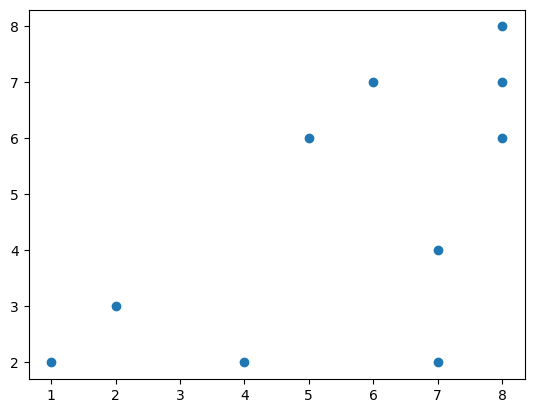

In [64]:
plt.scatter(df["A"], df["B"])
plt.show()

In [67]:
distance_matrix = np.array([[np.sqrt(np.sum(np.square(df.iloc[i] - df.iloc[j]))) for i in range(len(df))] for j in range(len(df))])

In [70]:
distance_matrix = np.round(distance_matrix, decimals=2)

In [71]:
distance_matrix

array([[0.  , 3.  , 6.4 , 3.61, 2.24, 7.21, 5.39, 5.66, 4.12, 3.  ],
       [3.  , 0.  , 5.1 , 2.  , 5.1 , 6.08, 5.1 , 4.12, 4.47, 6.  ],
       [6.4 , 5.1 , 0.  , 3.16, 7.21, 1.  , 2.  , 1.  , 3.16, 8.6 ],
       [3.61, 2.  , 3.16, 0.  , 5.1 , 4.12, 3.16, 2.24, 2.83, 6.32],
       [2.24, 5.1 , 7.21, 5.1 , 0.  , 7.81, 5.66, 6.71, 4.24, 1.41],
       [7.21, 6.08, 1.  , 4.12, 7.81, 0.  , 2.24, 2.  , 3.61, 9.22],
       [5.39, 5.1 , 2.  , 3.16, 5.66, 2.24, 0.  , 2.24, 1.41, 7.07],
       [5.66, 4.12, 1.  , 2.24, 6.71, 2.  , 2.24, 0.  , 3.  , 8.06],
       [4.12, 4.47, 3.16, 2.83, 4.24, 3.61, 1.41, 3.  , 0.  , 5.66],
       [3.  , 6.  , 8.6 , 6.32, 1.41, 9.22, 7.07, 8.06, 5.66, 0.  ]])